In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

from IPython.display import clear_output

# temp imports

import generate_dfs_helper as df_gen

Welcome to JupyROOT 6.12/04


In [2]:
## paths and dictionaries

prefix = 'data1/newg2/DataProduction/Offline/ArtTFSDir/v9_21_05_dev/FieldPlainRootOutput_'
sanitize = True

save_dir = 'hdf5/'
if sanitize:
    save_dir += 'sanitized/'

dict_60hr = {'fp_df_1':range(3959,3995),
             'tr_df_1':[3956], 'tr_df_2':[3997],
             'subrun_df':[15921, 15992]}

dict_9day = {'fp_df_1':range(4141,4179), 'fp_df_2':range(4193,4223),
             'fp_df_3':range(4229,4263), 'fp_df_4':range(4283,4489),
             'tr_df_1':[4138], 'tr_df_2':[4181], 'tr_df_3':[4189],
             'tr_df_4':[4226], 'tr_df_5':[4265], 'tr_df_6':[4493],
             'subrun_df':[16355, 16539]}

dict_highkick = {'fp_df_1':range(4061,4096), 'fp_df_2':range(4101,4122)+range(4123,4136),
                 'tr_df_1':[4058], 'tr_df_2':[4098], 'tr_df_3':[4138],
                 'subrun_df':[16110, 16256]}

dict_endgame = {#'fp_df_1':range(5000,5050),
                'fp_df_2':range(5057,5101),
                'fp_df_3':range(5120,5155), 'fp_df_4':range(5172,5215),
                'fp_df_5':range(5220,5257), 'fp_df_6':range(5262,5301),
                #'tr_df_1':[4197],
                'tr_df_2':[5054], 'tr_df_3':[5103],
                'tr_df_4':[5117], 'tr_df_5':[5157], 'tr_df_6':[5169],
                'tr_df_7':[5217], 'tr_df_8':[5259], #'tr_df_9':[5303],
                'subrun_df':[16908, 17528]}

dict_lowkick = {'fp_df_1':range(4542,4582),
                'tr_df_1':[4539], 'tr_df_2':[4584],
                'subrun_df':[16669, 16714]}

run_1_dict = {'60hr':dict_60hr, '9day':dict_9day, 'highkick':dict_highkick,
               'endgame':dict_endgame}#, 'lowkick':dict_lowkick}

In [ ]:
def save_df(dict_run, save_name):
    for frame in dict_run:
        clear_output()
        print frame
        if frame != 'subrun_df':
            if frame[:2] == 'tr':
                new_df = helper.root_to_pandas(dict_run[frame], prefix=prefix, tr_run=True, sanitize=sanitize)
            elif frame[:2] == 'fp':
                new_df = helper.root_to_pandas(dict_run[frame], prefix=prefix, tr_run=False, sanitize=sanitize)
            else:
                raise NameError('Unexpected key name.')
        else:
            new_df = df_gen.get_subrun_df(dict_run[frame][0], dict_run[frame][1])
        
        filename = save_dir+save_name
        new_df.to_hdf(filename, key=frame)
        
        clear_output()
        print 'Saved to: '+filename
            

In [ ]:
save_df(dict_endgame, 'endgame.h5')

In [ ]:
save_df(dict_60hr, '60hr.h5')
save_df(dict_highkick, 'highkick.h5')

In [ ]:
## This cell will save all of the run 1 data sets in run_1_dict

for run in run_1_dict:
    save_df(run_1_dict[run], run+'.h5')

Reading event 8720/8728 99.91%      
loop done: 100%                                    
Reading event 2620/2621 99.96%           
loop done: 100%                                    


analysis_helper.py:101: RuntimeWarning: invalid value encountered in greater
  drop = np.abs(start_array[i*bin_len:(i+1)*bin_len] - center) > std*width
analysis_helper.py:107: RuntimeWarning: invalid value encountered in greater
  drop = np.abs(start_array[num_bin*bin_len:] - center) > std*width


Reading event 1800/1803 99.83%  
loop done: 100%                                    
Reading event 540/541 99.82%   
loop done: 100%                                    


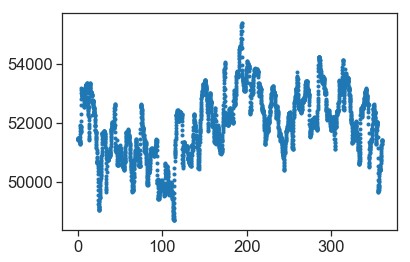

In [3]:
## generate the spliced dataframe for 9day trolley run 4 (the azimuthal coil correction)

tr_df_long = helper.root_to_pandas([4226], prefix=prefix, tr_run=True, sanitize=sanitize)
tr_df_shrt = helper.root_to_pandas([4224], prefix=prefix, tr_run=True, sanitize=sanitize)

# put stations 39-53 from the short cw run into the main run

cut_low = trfp.STATION_BARCODE_EDGES[39]
cut_high = trfp.STATION_BARCODE_EDGES[54]

df_ccw = tr_df_long.copy()
df_ccw = df_ccw[(df_ccw['tr_phi']<cut_low) | (df_ccw['tr_phi']>cut_high)]

df_cw = tr_df_shrt.copy()
df_cw = df_cw[(df_cw['tr_phi']>cut_low) & (df_cw['tr_phi']<cut_high)]

tr_df_4a = df_cw.copy()
tr_df_4a = tr_df_4a.append(df_ccw)

filename = save_dir+'9day.h5'

tr_df_4a.to_hdf(filename, 'tr_df_4a')

plt.plot(tr_df_4a['tr_phi'], tr_df_4a['tr0'], '.')